In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1311.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    2.40e-44
Time:                        20:46:36   Log-Likelihood:                         -592.27
No. Observations:                  65   AIC:                                      1187.
Df Residuals:                      64   BIC:                                      1189.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    10.7315      0.296     36.206      0.000      10.139      11.324
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.035   Jarque-Bera (JB):               11.017
Skew:                           0.141   Prob(JB):                      0.00405
Kurtosis:                       4.997   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

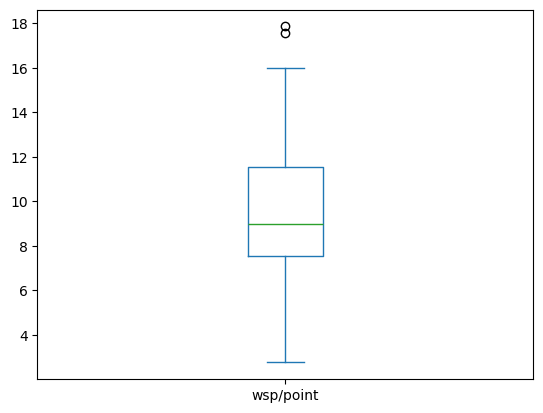

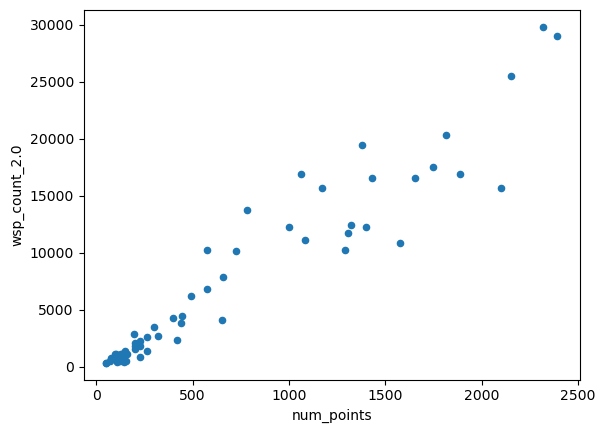

In [13]:
df = df[~df['wsp_count_2.0'].isna()] # Remove NAN wsp_counts
df["wsp/point"].plot.box()
df.plot.scatter("num_points", "wsp_count_2.0")
results = sm.OLS(df["wsp_count_2.0"].astype(float), df["num_points"].astype(float)).fit()
results.summary()

In [14]:
df = df[~df['opt_len'].isna()] # remove problems with unoptimal lens

In [15]:
df["nn error"] = df["nn_len"] / df["opt_len"]
df

/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_49815/2909696333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nn error"] = df["nn_len"] / df["opt_len"]


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point,nn error
name,,,,,,,,,,,
berlin52,52,7544.365902,9194.130643,10818.833107,22846.619539,NaN,NaN,1.172874e+04,376,7.230769,1.218675
ch130,130,6110.86095,7378.680775,10043.991903,20993.789501,NaN,NaN,1.709921e+04,1097,8.438462,1.20747
ch150,150,6532.280933,7982.489176,10882.8634,29154.866635,NaN,NaN,2.970518e+04,1402,9.346667,1.222006
eil101,101,642.309536,862.68158,939.98217,1787.075871,NaN,NaN,1.296031e+03,1171,11.594059,1.343093
eil51,51,429.983312,590.674036,562.995183,800.237585,NaN,NaN,8.951434e+02,360,7.058824,1.373714
eil76,76,545.387552,707.751657,790.592842,822.832783,NaN,NaN,9.371500e+02,761,10.013158,1.297704
kroA100,100,21285.443182,27385.446195,39076.531975,60632.610851,NaN,NaN,4.550216e+04,792,7.92,1.286581
kroC100,100,20750.762504,28820.352399,38320.748276,59171.763282,NaN,NaN,6.335599e+04,728,7.28,1.388882
kroD100,100,21294.290821,27428.500507,40281.487011,58909.075462,NaN,NaN,8.670203e+04,930,9.3,1.288068


<Axes: xlabel='wsp/point', ylabel='nn error'>

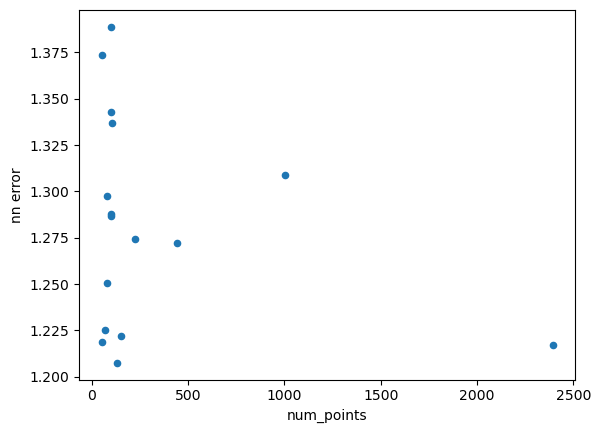

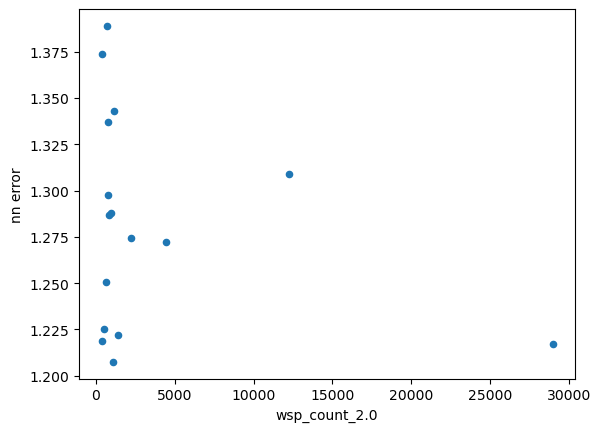

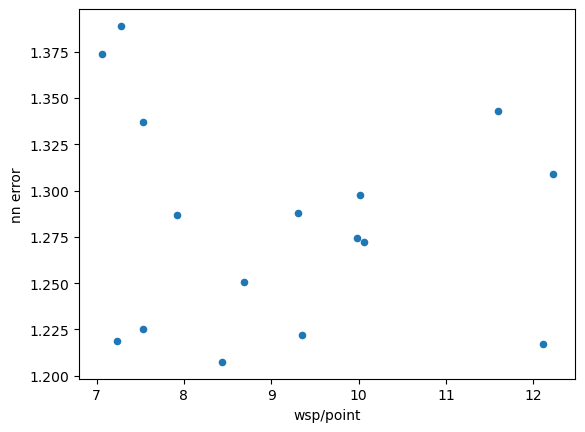

In [20]:
df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
df.plot.scatter("wsp/point", "nn error")